## Кластеризация данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Чтение данных

In [2]:
data = pd.read_csv("data/iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Предобработка данных

In [3]:
data = data.drop(columns=['Id'])
features = data.iloc[:, 0:4]
classes = data.iloc[:, 4]

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

### K-Means

In [48]:
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_init=15, n_clusters=3)
k_means.fit(scaled_data)

k_means_labels = k_means.predict(scaled_data)

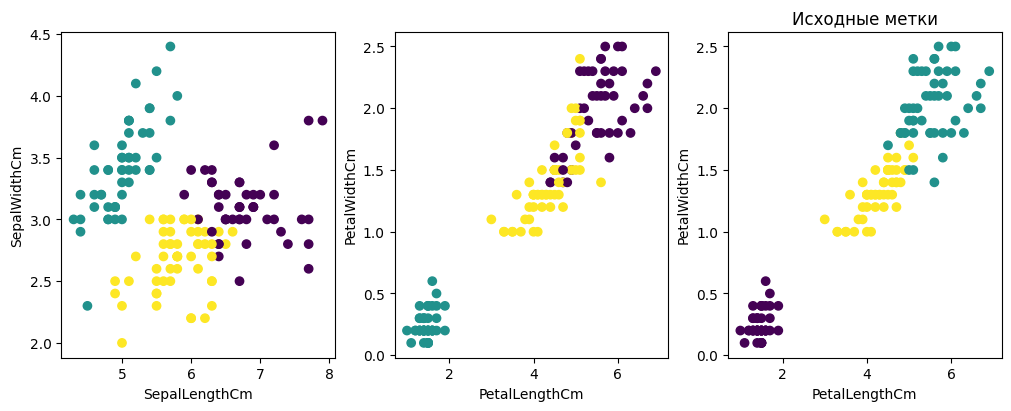

In [127]:
fig, axs = plt.subplots(ncols=3, layout="constrained", figsize = (10, 4))

axs[0].scatter(data.loc[:, ['SepalLengthCm']], data.loc[:, ['SepalWidthCm']], c=k_means_labels)
axs[0].set_xlabel('SepalLengthCm')
axs[0].set_ylabel('SepalWidthCm')

axs[1].scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=k_means_labels)
axs[1].set_xlabel('PetalLengthCm')
axs[1].set_ylabel('PetalWidthCm')

correct_labels = classes.replace({"Iris-setosa": 0, "Iris-versicolor": 2, 'Iris-virginica': 1})
axs[2].scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=correct_labels)
axs[2].set_title('Исходные метки')
axs[2].set_xlabel('PetalLengthCm')
axs[2].set_ylabel('PetalWidthCm')

plt.show()

In [128]:
k_means_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [97]:
k_means_labels[0:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [95]:
k_means_labels[50:100]

array([0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [96]:
k_means_labels[100:]

array([0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 2])

In [129]:
print('Количество правильно кластеризованных значений: 125')
print(f'Процент правильно кластеризованных значений: {125 / 150}')

Количество правильно кластеризованных значений: 125
Процент правильно кластеризованных значений: 0.8333333333333334


### Fuzzy C-means

In [91]:
from fcmeans import FCM

fcm = FCM(n_clusters=3)
fcm.fit(scaled_data)
fcm_labels = fcm.predict(scaled_data)

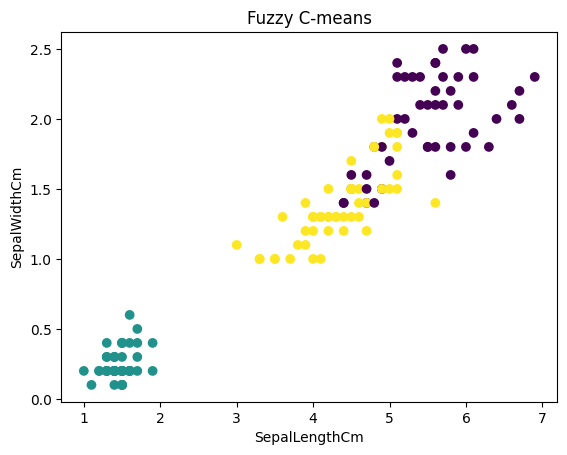

In [92]:
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=fcm_labels)
plt.title('Fuzzy C-means')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [93]:
print({list(gmm_labels).count(0)})
print({list(gmm_labels).count(1)})
print({list(gmm_labels).count(2)})

{55}
{50}
{45}


In [94]:
fcm_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int64)

### DBSCAN

In [45]:
from sklearn.cluster import DBSCAN

EPS = 0.55
MIN_SAMPLES = 4
METRIC = 'euclidean'

dbscan = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES, metric=METRIC)
dbscan_labels = dbscan.fit_predict(scaled_data)

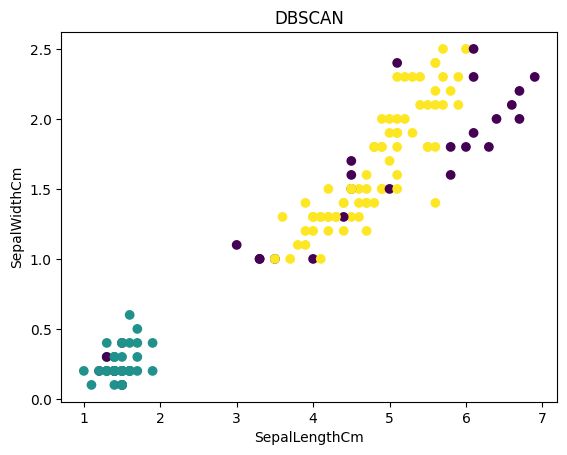

In [46]:
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=dbscan_labels)
plt.title('DBSCAN')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [47]:
print(f'Количество найденных кластеров: {len(set(dbscan_labels)) - 1}')
print(f'Количество некластеризованных значений: {list(dbscan_labels).count(-1)}')
print(f'Процент некластеризованных значений: {list(dbscan_labels).count(-1) / len(list(dbscan_labels))}%')

Количество найденных кластеров: 2
Количество некластеризованных значений: 28
Процент некластеризованных значений: 0.18666666666666668%


In [51]:
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

### GMM

In [12]:
from sklearn.mixture import GaussianMixture

COMP = 3

gmm = GaussianMixture(n_components=COMP)
gmm.fit(scaled_data)
gmm_labels = gmm.predict(scaled_data)

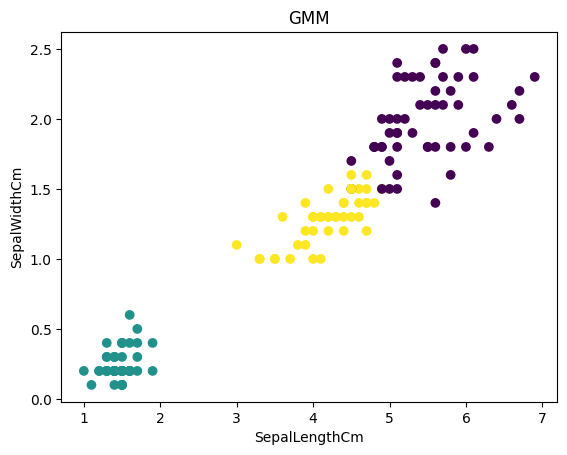

In [13]:
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=gmm_labels)
plt.title('GMM')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [52]:
gmm_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [88]:
print({list(gmm_labels).count(0)})
print({list(gmm_labels).count(1)})
print({list(gmm_labels).count(2)})

{55}
{50}
{45}


### Kohonen self-organizing maps

In [84]:
from sklearn_som.som import SOM

som = SOM(m=3, n=1, dim=4)
som.fit(scaled_data)
som_labels = som.predict(scaled_data)

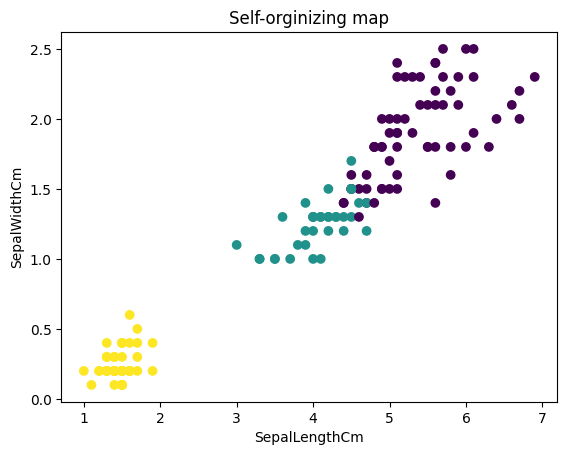

In [85]:
plt.scatter(data.loc[:, ['PetalLengthCm']], data.loc[:, ['PetalWidthCm']], c=som_labels)
plt.title('Self-orginizing map')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [86]:
print({list(som_labels).count(0)})
print({list(som_labels).count(1)})
print({list(som_labels).count(2)})

{65}
{35}
{50}


In [87]:
som_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### t-SNE

In [14]:
from sklearn.manifold import TSNE

perplexity = 50
tsne = TSNE(n_components=2, perplexity=perplexity)
tsne_data = tsne.fit_transform(scaled_data)

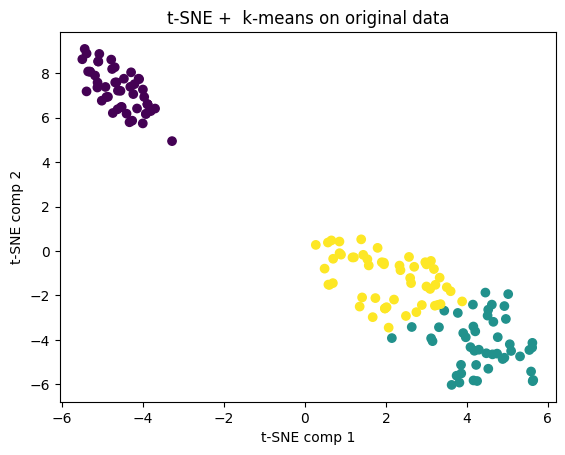

In [15]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels)
plt.title('t-SNE +  k-means on original data')
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()

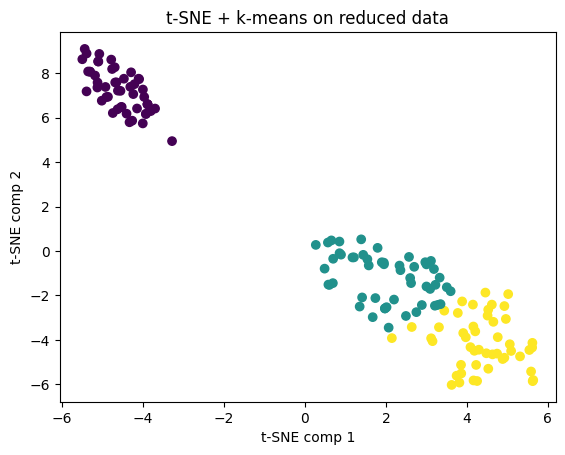

In [16]:
k_means_t_sne = KMeans(init="k-means++", n_init=15, n_clusters=3)
k_means_t_sne.fit(tsne_data)
t_sne_labels = k_means_t_sne.predict(tsne_data)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=t_sne_labels)
plt.title('t-SNE + k-means on reduced data')
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()

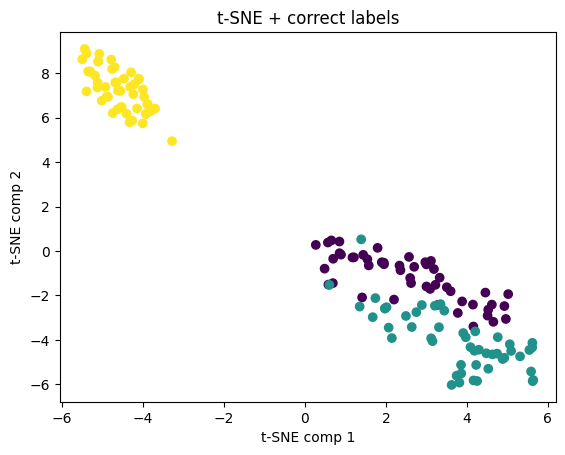

In [17]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=correct_labels)
plt.title('t-SNE + correct labels')
plt.xlabel('t-SNE comp 1')
plt.ylabel('t-SNE comp 2')
plt.show()